<a href="https://colab.research.google.com/github/rajaatif/Disease-Data-Collection-from-NCBI-database-with-certain-Traits/blob/main/P_gene_93_44_(Training_Validation_Testing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vis

In [ ]:


import gdown
import pandas as pd
# Define the Google Drive public link
url = 'https://drive.google.com/uc?id=1ISNOfZnPmr6vfcc6HSYhb2ehG_h_bHEB'

# Define the file name to save the DataFrame
output_file = 'dataset.csv'

# Download the file from the Google Drive link
gdown.download(url, output_file, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1ISNOfZnPmr6vfcc6HSYhb2ehG_h_bHEB
To: /content/dataset.csv
100%|██████████| 26.9M/26.9M [00:00<00:00, 78.1MB/s]


'dataset.csv'

In [ ]:
import pandas as pd
df2=pd.read_csv("/content/dataset.csv")
# Create a boolean mask for rows where 'Disease' is 'HCC'
nhcc_mask = df2['Disease'] != 'HCC'
#.sample(3000,random_state=42)
# Apply drop_duplicates only to the subset of rows with 'HCC'
df2 =   pd.concat([df2[~nhcc_mask], df2[nhcc_mask].drop_duplicates(subset=['seq'], keep='first')], ignore_index=True).reset_index(drop=True).drop_duplicates('seq')

In [ ]:
# df2=df2.loc[df2['simulated_gene'] !=1]

In [ ]:
df2=df2.loc[df2['Vrius_Gene'] =='P']

In [ ]:
len(df2)

1307

In [ ]:
df2['simulated_gene'].value_counts()

,count
simulated_gene,
0.0,880
1.0,427


In [ ]:
df2['synthetic'].value_counts()

,count
synthetic,
0,1304
1,3


In [ ]:
df2=df2.loc[df2['synthetic'] !=1]

In [ ]:
len(df2)

5180

In [ ]:
df2.loc[df2['Disease'] == 'HCC', 'labels'] = 1
df2.loc[df2['Disease'] != 'HCC', 'labels'] = 0


In [ ]:
df2=df2.loc[~df2['Disease'].isin(['occult HBV infection','acute-on-chronic liver failure','chronic HBV infection','chronic hepatitis B', 'chronic liver inflammation','liver cirrhosis','HBV-HIV coinfection'])]

In [ ]:
# df2=df2.loc[df2['simulated_gene'] !=1]

In [ ]:
df2.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Sequence', 'Sequence_description',
       'Virus_genotype', 'Isolation_source', 'Disease', 'Vrius_Gene', 'seq',
       'uncovered_reg', 'simulated_gene', 'length', 'AA', 'AT', 'AC', 'AG',
       'TA', 'TT', 'TC', 'TG', 'CA', 'CT', 'CC', 'CG', 'GA', 'GT', 'GC', 'GG',
       'synthetic', 'Cluster', 'Cluster2', 'labels'],
      dtype='object')

In [ ]:
df2['Disease'].value_counts()

,count
Disease,
HBV-infection patients,629
HCC,584
acute hepatitis B,5


# DCR

# Set Env

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from scipy.spatial.distance import cdist
import numpy as np

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from scipy.spatial.distance import cdist
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os
import glob
import pandas as pd

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
#import torch
import numpy as np

import torch
from torch.utils.data import Dataset, DataLoader, BatchSampler, RandomSampler
import random

from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
from transformers import BertModel

from transformers import AdamW, get_linear_schedule_with_warmup


import random
import time
import torch.nn as nn

from transformers import AdamW, get_linear_schedule_with_warmup

import numpy as np
import torch
import torch.nn as nn
from transformers import AdamW, get_linear_schedule_with_warmup
#device='cuda'

import random
import time
import torch.nn as nn

import torch
import torch.nn as nn
from transformers import BertModel

import sys
import time
import traceback
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os
from tqdm.auto import tqdm
import warnings

warnings.filterwarnings("ignore")

# os.system("cls")

import warnings
warnings.filterwarnings("ignore")

class ConvertDNALabelEncoder(object):
    """
        convert dna sequence string csv file to dna label encoder csv file and viceverse
    """
    def __init__(self):
        pass

    @staticmethod
    def convert_dna_string_to_dna_labelencoder(dna_string_csv_path, dna_labelencoder_csv_path):
        """
            convert dna sequence string csv file to dna label encoder csv file
        args:
            dna_string_csv_path (string): dna string csv file path
            dna_labelencoder_csv_path (string): dna label encoder csv file path
        returns:
            none
        """
        try:
            df_dna_string = pd.read_csv(filepath_or_buffer=dna_string_csv_path) # .iloc[:10,:]
            #print(len(df_dna_string))
            label_encoder = LabelEncoder()
            #label_encoder.classes_=['A','C','G','T']
            dna_string_list = []
            for row in tqdm(range(len(df_dna_string))):
                #print(row[3])
                dna_string_row = df_dna_string['seq'][row] #.replace('M','') #.Sequence
                dna_string_row = ''.join(filter(lambda x: x in 'ATCG', dna_string_row))
                #print(dna_string_row)
                dna_string_nparray = np.array(list(dna_string_row))
                sample=['A','T','C','G','N']
                #print(dna_string_nparray)
                label_encoder.fit(sample)
                dna_labelencoder_row = label_encoder.transform(dna_string_nparray)
                dna_string_list.append(dna_labelencoder_row.astype(np.int8))
            #df_dna_labelencoder = pd.DataFrame(dna_string_list)
            #df_dna_labelencoder.to_csv(path_or_buf=dna_labelencoder_csv_path, index=False, header=None)
            return dna_string_list, df_dna_string['labels'],df_dna_string
        except:
            print("An error occurred. {}".format(ConvertDNALabelEncoder.get_exception_stack_trace()))
            return "nothing"

    @staticmethod
    def convert_dna_labelencoder_to_dna_string(dna_labelencoder_csv_path, dna_string_csv_path):
        """
            convert dna sequence label encoder csv file to dna string csv file
        args:
            dna_labelencoder_csv_path (string): dna label encoder csv file path
            dna_string_csv_path (string): dna string csv file path
        """
        try:
            df_dna_labelencoder = pd.read_csv(filepath_or_buffer=dna_labelencoder_csv_path, header=None)
            dna_labelencoder_list = df_dna_labelencoder.values.tolist()
            dna_string_list = []
            for item in dna_labelencoder_list:
                dna_string = ""
                for column in item:
                    if column == 0:
                        nucleotide_letter = "A"
                    elif column == 1:
                        nucleotide_letter = "C"
                    elif column == 2:
                        nucleotide_letter = "G"
                    elif column == 3:
                        nucleotide_letter = "T"
                    dna_string += nucleotide_letter
                dna_string_list.append(dna_string)
            df_dna_string = pd.DataFrame(dna_string_list)
            df_dna_string.to_csv(path_or_buf=dna_string_csv_path, index=False, header=None)
        except:
            print("An error occurred. {}".format(ConvertDNALabelEncoder.get_exception_stack_trace()))

    @staticmethod
    def get_exception_stack_trace():
        """
            get exception stack trace
        args:
            none
        returns:
            exception_stack_trace (string): exception stack trace parameters
        """
        try:
            exception_type, exception_value, exception_traceback = sys.exc_info()
            file_name, line_number, procedure_name, line_code = traceback.extract_tb(exception_traceback)[-1]
            exception_stack_trace = ''.join('[Time Stamp]: ' + str(time.strftime('%d-%m-%Y %I:%M:%S %p')) + '' + '[File Name]: ' + str(file_name) + ' '
            + '[Procedure Name]: ' + str(procedure_name) + ' '
            + '[Error Message]: ' + str(exception_value) + ' '
            + '[Error Type]: ' + str(exception_type) + ' '
            + '[Line Number]: ' + str(line_number) + ' '
            + '[Line Code]: ' + str(line_code))
        except:
            print("An error occurred in {}".format("get_exception_stack_trace() function"))
        return exception_stack_trace

    @staticmethod
    def get_program_running(start_time):
        """
            calculate program running
        args:
            start_time (string): start time program runtime
        returns:
            none
        """
        try:
            end_time = time.time()
            diff_time = end_time - start_time
            result = time.strftime("%H:%M:%S", time.gmtime(diff_time))
            print("program runtime: {}".format(result))
        except:
            print("An error occurred. {}".format(ConvertDNALabelEncoder.get_exception_stack_trace()))
import pandas as pd
def generate_dataset(df3,test=False):
    #df=df3
    if(test==False):
        temp_df=df3
        temp_df['seq'] = temp_df['seq'].astype('str')
        # mask = temp_df['seq'].str.len() <= 60000
        # temp_df = temp_df.loc[mask]
        temp_df.to_csv("data.csv")
        convertDNALabelEncoder=ConvertDNALabelEncoder()
        dna_string_csv_path = "./data.csv"
        dna_labelencoder_csv_path = "./num_complete.csv"
        df_dna_labelencoder,y,org=convertDNALabelEncoder.convert_dna_string_to_dna_labelencoder(dna_string_csv_path, dna_labelencoder_csv_path)
        return df_dna_labelencoder,y,org
    elif(test==True):
        temp_df=df
        temp_df['seq'] = temp_df['seq'].astype('str')
        # mask = temp_df['seq'].str.len() >= 60000
        # temp_df = temp_df.loc[mask]
        temp_df.to_csv("data.csv")
        convertDNALabelEncoder=ConvertDNALabelEncoder()
        dna_string_csv_path = "./data.csv"
        dna_labelencoder_csv_path = "./num_complete.csv"
        df_dna_labelencoder,y=convertDNALabelEncoder.convert_dna_string_to_dna_labelencoder(dna_string_csv_path, dna_labelencoder_csv_path)
        return df_dna_labelencoder,y
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __getitem__(self, idx):
        x = self.X[idx]
        x = np.array(x)
        #x = x[:8000]  # Truncate the array to the first 5000 elements
        #x = np.pad(x, (0, 8000 - len(x)), mode='constant', constant_values=7)  # Pad the array with zeros to a length of 5000
        return x, self.y[idx]

    def __len__(self):
        return len(self.X)

# Create the BertClassfier class
class PretrainedBert(nn.Module):
    def __init__(self,output_nodes, freeze_bert=False):

        super(PretrainedBert, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        D_in, H, D_out = 512, 64, output_nodes
        # Instantiate BERT model
        from transformers import BertConfig

        self.config = BertConfig(
          # we align this to the tokenizer vocab_size
        max_position_embeddings=255,
        hidden_size=512,
        num_attention_heads=16,
        num_hidden_layers=2,
        type_vocab_size=1,
        intermediate_size=1024,
        vocab_size=16
)
        from transformers import BertForMaskedLM

        self.bert =BertModel(self.config)
        # Instantiate an one-layer feed-forward classifier
        self.classifier = nn.Sequential(
            #nn.ReLU(),
            #nn.Dropout(0.2),
            nn.Linear(D_in, H),
            # nn.Linear(D_in, H),
            nn.ReLU(),
            #nn.Dropout(0.005),
            nn.Linear(H, D_out),
            #nn.Sigmoid()
        )

        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, input_ids, attention_mask):
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)

        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits
from transformers import AdamW, get_linear_schedule_with_warmup

def initialize_pretrainedBert(train_dataloader,virus_dir,output_nodes,epochs=4):
    # Instantiate Bert Classifier
    bert_classifier = PretrainedBert(output_nodes,freeze_bert=False)

    # Tell PyTorch to run the model on GPU
    #bert_classifier.to(device)

    # Create the optimizer
    optimizer = AdamW(bert_classifier.parameters(), #,
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                      )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs #

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler
import torch
import torch.nn as nn
from transformers import AdamW, get_linear_schedule_with_warmup
from transformers import XLNetModel, XLNetConfig
import torch
import torch.nn as nn
from transformers import BertModel

class FinetunningBertXLNet7(nn.Module):
    """BERT Model for Classification Tasks."""
    def __init__(self, virus_dir, output_nodes, layers, freeze_bert=False):
        super(FinetunningBertXLNet7, self).__init__()

        # Load your pre-trained BERT model
        bert_classifier = PretrainedBert(2, freeze_bert=freeze_bert)  # Replace with actual model loading code
        bert_classifier.load_state_dict(torch.load(virus_dir + './epoch17.pt', map_location=torch.device(device)))
        self.bert = bert_classifier.bert

        if freeze_bert:
            print("Freezed")
            for param in self.bert.parameters():
                param.requires_grad = False

        # Classifier layer (The output size after BERT's last hidden state)
        self.classifier = nn.Linear(512, output_nodes)

    def forward(self, input_ids, attention_mask):
        # Get BERT outputs
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden_state = outputs.last_hidden_state[:, 0, :]  # Shape: [batch_size, seq_length, hidden_size]
       # print(last_hidden_state.shape)

        # Apply Global Average Pooling (GAP) to handle variable sequence lengths
        pooled_output = last_hidden_state.mean(dim=0).view(1,-1)  # Shape: [batch_size, hidden_size]
       # print(pooled_output.shape)

        # Pass the pooled output through the classifier
        logits = self.classifier(pooled_output)  # Shape: [batch_size, output_nodes]

        return logits


import torch
import torch.nn as nn
from transformers import BertModel




def initialize_FinetunningBertXLNet7(train_dataloader,virus_dir,output_nodes,layers,freeze_bert,epochs=4):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    # Instantiate Bert Classifier
    bert_classifier = FinetunningBertXLNet7(virus_dir,output_nodes,layers,freeze_bert=freeze_bert)

    # Tell PyTorch to run the model on GPU
    bert_classifier.to(device)

    # Create the optimizer
    optimizer = AdamW(bert_classifier.parameters(),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                      )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler


In [ ]:
import pandas as pd
from collections import Counter

# Sample DataFrame with sequences
# df = pd.DataFrame({'seq': ['ATGCGATCGA', 'CGATCGTACG', 'ATATCGCGAT']})

# Function to calculate DCR for a given sequence
def calculate_dcr(sequence):
    # Define all possible dinucleotides
    dinucleotides = [a + b for a in "ATCG" for b in "ATCG"]

    # Initialize counts for each dinucleotide
    dnt_counts = dict.fromkeys(dinucleotides, 0)

    # Count dinucleotide occurrences in the sequence
    for i in range(len(sequence) - 1):
        dnt = sequence[i:i+2]  # Get the dinucleotide
        if dnt in dnt_counts:
            dnt_counts[dnt] += 1

    # Total number of dinucleotides (length - 1) to normalize the counts
    total_dnts = sum(dnt_counts.values())

    # Normalize to get frequency
    if total_dnts > 0:
        dcr = {dnt: count / total_dnts for dnt, count in dnt_counts.items()}
    else:
        # Handle case where there are no valid dinucleotides
        dcr = {dnt: 0 for dnt in dinucleotides}

    return dcr



def validate_model(model, val_loader):
    loss_fun = nn.CrossEntropyLoss()
    model.eval()
    total_val_loss=0
    all_preds = []
    true_labels=[]
    all_labels = []
    total_loss, batch_loss, batch_counts = 0, 0, 0

    for step, batch in enumerate(val_loader):
        batch_counts += 1

        x, y_ = batch

        true_labels.append(int(y_[0]))

        # Divide each sequence in the batch into non-overlapping chunks
        batch_chunks, batch_masks, labels = [], [], []

        # if len(x[0][:int(len(x[0]) / 250) * 250]) != 0:
        #     print(1)
        #     chunk, mask = non_overlapping_sliding_window(x[0][:int(len(x[0]) / 250) * 250], 250, 250)
        # if len(x[0][:int(len(x[0]) / 250) * 250]) == 0 and len(x[0]) < 250:
        #     print(2)
        #     chunk, mask = non_overlapping_sliding_window(x[0][:], 250, 250)
        if len(x[0][:]) != 0 and len(x[0][:]) <= 30000:
            chunk, mask = non_overlapping_sliding_window(x[0][:], 250, 250)
        if len(x[0][:int(len(x[0]) / 250) * 250]) == 0 and len(x[0]) < 250:
            chunk, mask = non_overlapping_sliding_window(x[0][:], 250, 250)

        batch_chunks.extend(chunk)


        batch_chunks = torch.stack([torch.tensor(batch_chunk) for batch_chunk in batch_chunks])
        batch_masks.extend(mask)
        batch_masks = torch.stack(batch_masks)

        y_ = A.transform(np.array(y_[0]).reshape(1, -1))
        labels.append(y_)

        batch_chunks = torch.tensor(batch_chunks)
        batch_masks = torch.tensor(batch_masks)

        batch_masks_ = np.insert(batch_masks.numpy(), 0, 1, axis=1)
        batch_masks_ = np.insert(batch_masks_, -1, 1, axis=1)

        batch_masks = torch.tensor(batch_masks_)
        batch_masks = torch.where(batch_masks == True, torch.ones_like(batch_masks, dtype=torch.int),
                                    torch.zeros_like(batch_masks, dtype=torch.int)).to(device)

        batch_inputs_ = np.insert(batch_chunks.numpy(), 0, 12, axis=1)
        batch_inputs_ = np.insert(batch_inputs_, 251, 13, axis=1)

        labels = torch.tensor(labels).to(device)
        batch_inputs = torch.tensor(batch_inputs_).to(device)

        new_model.zero_grad()
        batch_inputs = torch.tensor(batch_inputs, dtype=torch.long).to(device)  # Long for input_ids
        batch_masks = torch.tensor(batch_masks, dtype=torch.long).to(device)  # Long for attention masks

        logits = new_model(torch.tensor(batch_inputs, dtype=torch.int64),
                            attention_mask=torch.tensor(batch_masks, dtype=torch.int64))
        predicted_labels = torch.argmax(torch.tensor(np.sum(np.array(logits.cpu().detach().numpy()),axis=0)), dim=0)
        all_preds.append(int(predicted_labels))
        #labels = labels[0].repeat(len(batch_inputs), 1)

        with torch.autocast('cuda'):
            loss = loss_fn(logits, labels[0])
        batch_loss += loss.item()
        total_loss += loss.item()
   # print(all_preds , true_labels)
    total_correct=(np.array(all_preds) == np.array(true_labels)).sum().item()  #/len(true_labels)
    avg_val_loss = total_loss / len(val_loader)
    accuracy = total_correct / len(true_labels) # if total_samples > 0 else 0  # Calculate accuracy

    print(f"Validation Loss: {avg_val_loss:.4f}, Accuracy: {accuracy:.4f}")

    return avg_val_loss, accuracy
def non_overlapping_sliding_window(sequence, window_size, stride):
    chunks = []
    masks = []
    for i in range(0, len(sequence), stride):
        chunk = sequence[i:i + window_size]
        mask = torch.ones(window_size, dtype=torch.bool)
        if len(chunk) < window_size:
            chunk = tuple(chunk) + (0,) * (window_size - len(chunk))
            mask = mask[:len(chunk)]
        chunks.append(chunk)
        masks.append(mask)
  #  print(len(sequence),len(chunks))
    return chunks, masks

# Training

In [ ]:


import gdown
import pandas as pd
# Define the Google Drive public link
url = 'https://drive.google.com/uc?id=1BSmhgZr394cNMyvoij1zCNDcwe0QwAsn'

# Define the file name to save the DataFrame
output_file = 'epoch17.pt'

# Download the file from the Google Drive link
gdown.download(url, output_file, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1BSmhgZr394cNMyvoij1zCNDcwe0QwAsn
To: /content/epoch17.pt
100%|██████████| 18.6M/18.6M [00:00<00:00, 30.5MB/s]


'epoch17.pt'

In [ ]:


import pickle
df_dna_labelencoder,y,org=generate_dataset(df2)
dictionary={'df_dna_labelencoder':df_dna_labelencoder,'y':y}
with open('cancer.pkl', 'wb') as f:
    pickle.dump(dictionary, f)
from sklearn.model_selection import train_test_split
import pickle
import warnings

warnings.filterwarnings("ignore")
with open('./cancer.pkl', 'rb') as pickle_file:
    p = pickle.load(pickle_file)
import numpy as np
X=list(p['df_dna_labelencoder'])
y= list(p['y'])
X_train, X_test, y_train, y_test, Z_train, Z_test = train_test_split(
    X, y, org, test_size=0.05, stratify=y, random_state=42
)


random.seed(42)


traindataset = MyDataset(X_train, y_train)

# Create a sampler that will return a single index for each batch
trainsampler = RandomSampler(traindataset)

# Create a batch sampler that will wrap the sampler and return batches of size 1
trainbatch_sampler = BatchSampler(trainsampler, batch_size=1, drop_last=True)

# Create a data loader that will use the batch sampler
traindata_loader = DataLoader(traindataset, batch_sampler=trainbatch_sampler)

testdataset = MyDataset(X_test, y_test)

# Create a sampler that will return a single index for each batch
testsampler = RandomSampler(testdataset)

# Create a batch sampler that will wrap the sampler and return batches of size 1
testbatch_sampler = BatchSampler(testsampler, batch_size=1, drop_last=True)

# Create a data loader that will use the batch sampler
testdata_loader = DataLoader(testdataset)

  0%|          | 0/1218 [00:00<?, ?it/s]

In [ ]:
Z_train.loc[Z_train['labels']==0]['Disease'].value_counts()

,count
Disease,
HBV-infection patients,597
acute hepatitis B,5


In [ ]:
Z_test.loc[Z_test['labels']==0]['Disease'].value_counts()

,count
Disease,
HBV-infection patients,32


In [ ]:
Z_train.loc[Z_train['labels']==1]['Disease'].value_counts()

,count
Disease,
HCC,555


In [ ]:
Z_test.loc[Z_test['labels']==1]['Disease'].value_counts()

,count
Disease,
HCC,29


In [ ]:

import random
import time
import torch.nn as nn
device='cuda'
# Specify loss function
loss_fn =  nn.BCEWithLogitsLoss(size_average=True) #
new_model, optimizer, scheduler = initialize_FinetunningBertXLNet7(traindata_loader,'',2,2,False,epochs=2)
new_model.to(device)
import torch
from torch.utils.data import DataLoader, BatchSampler, RandomSampler
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
sample = ['A', 'T', 'C', 'G', 'N']
A = make_column_transformer(
    (OneHotEncoder(categories='auto'), [0]),
    remainder="passthrough"
)
A.fit(np.array(y).reshape(-1, 1))
# Prepare to save the best model
best_loss = float('inf')  # Initialize to a high value for loss

total_loss, batch_loss, batch_counts = 0, 0, 0

In [ ]:
new_model

FinetunningBertXLNet7(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(16, 512, padding_idx=0)
      (position_embeddings): Embedding(255, 512)
      (token_type_embeddings): Embedding(1, 512)
      (LayerNorm): LayerNorm((512,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-1): 2 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=512, out_features=512, bias=True)
              (key): Linear(in_features=512, out_features=512, bias=True)
              (value): Linear(in_features=512, out_features=512, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=512, out_features=512, bias=True)
              (LayerNorm): LayerNorm((512,), eps=1e-12, elementw

In [ ]:

new_model.train()
breaker=0
for epoch in range(3):
    for step, batch in enumerate(traindata_loader):
        batch_counts += 1

        x, y_ = batch
        #print(len(x[0]))

        batch_chunks, batch_masks, labels = [], [], []


        if len(x[0][:]) != 0  and len(x[0][:]) <= 30090:

            chunk, mask = non_overlapping_sliding_window(x[0][:], 250, 250)
        if len(x[0][:int(len(x[0]) / 250) * 250]) == 0 and len(x[0]) < 250:
            chunk, mask = non_overlapping_sliding_window(x[0][:], 250, 250)

        batch_chunks.extend(chunk)


        batch_chunks = torch.stack([torch.tensor(batch_chunk) for batch_chunk in batch_chunks])

        batch_masks.extend(mask)
        batch_masks = torch.stack(batch_masks)

        y_ = A.transform(np.array(y_[0]).reshape(1, -1))
        y_=np.array(y_)
        labels.append(y_)


        batch_chunks = torch.tensor(batch_chunks)
        batch_masks = torch.tensor(batch_masks)

        batch_masks_ = np.insert(batch_masks.numpy(), 0, 1, axis=1)
        batch_masks_ = np.insert(batch_masks_, -1, 1, axis=1)

        batch_masks = torch.tensor(batch_masks_)
        batch_masks = torch.where(batch_masks == True, torch.ones_like(batch_masks, dtype=torch.int),
                                    torch.zeros_like(batch_masks, dtype=torch.int)).to(device)

        batch_inputs_ = np.insert(batch_chunks.numpy(), 0, 12, axis=1)
        batch_inputs_ = np.insert(batch_inputs_, 251, 13, axis=1)

        labels = torch.tensor(labels).to(device)
        batch_inputs = torch.tensor(batch_inputs_).to(device)

        new_model.zero_grad()
        batch_inputs = torch.tensor(batch_inputs, dtype=torch.long).to(device)  # Long for input_ids
        batch_masks = torch.tensor(batch_masks, dtype=torch.long).to(device)  # Long for attention masks


        logits = new_model(torch.tensor(batch_inputs, dtype=torch.int64),
                            attention_mask=torch.tensor(batch_masks, dtype=torch.int64))



        with torch.autocast('cuda'):
            loss = loss_fn(logits, labels[0])
        batch_loss += loss.item()
        total_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(new_model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

        if (step % 20 == 0 and step != 0) or (step == len(traindata_loader) - 1):
            print(f"{epoch + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9}")
            batch_loss, batch_counts = 0, 0



    # Validation step to calculate the validation loss
    val_loss,acc = validate_model(new_model, testdata_loader)
    new_model.train()

    # Save the best model based on validation loss
    if val_loss < best_loss:
        best_loss = val_loss
        torch.save(new_model.state_dict(), './model.pt')
        print(f"Validation Loss: {val_loss:.4f}, Accuracy: {acc:.4f}")




   1    |   20    |   0.841603   |     -      |     -    
   1    |   40    |   0.805735   |     -      |     -    
   1    |   60    |   1.154883   |     -      |     -    
   1    |   80    |   1.244172   |     -      |     -    
   1    |   100   |   1.578555   |     -      |     -    
   1    |   120   |   0.834516   |     -      |     -    
   1    |   140   |   0.779984   |     -      |     -    
   1    |   160   |   1.107245   |     -      |     -    
   1    |   180   |   0.724960   |     -      |     -    
   1    |   200   |   0.665066   |     -      |     -    
   1    |   220   |   0.646612   |     -      |     -    
   1    |   240   |   0.565123   |     -      |     -    
   1    |   260   |   0.919696   |     -      |     -    
   1    |   280   |   0.688680   |     -      |     -    
   1    |   300   |   0.969786   |     -      |     -    
   1    |   320   |   0.840564   |     -      |     -    
   1    |   340   |   0.838081   |     -      |     -    
   1    |   36

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model_save_path = '/content/drive/MyDrive/Upwork_Projects/HBV/P_Gene_93_44%.pt'  # Path to save the best model
torch.save(new_model.state_dict(), model_save_path)


In [ ]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from oauth2client.service_account import ServiceAccountCredentials
import pkg_resources
from datetime import date
import sys
import os
import gdown
import pandas as pd

# Define the Google Drive public link
url = 'https://drive.google.com/uc?id=17hVE2R7EM9pLhN_Ro3TpTJY_xEmCWeMn'

# Define the file name to save the DataFrame
output_file = 'client.json'

# Download the file from the Google Drive link
gdown.download(url, output_file, quiet=False)
# Change directory to where your client.json file is located
#os.chdir('/kaggle/input/secret2')

def upload_file_to_gdrive(file_path, file_name):
    gauth = GoogleAuth()
    # NOTE: if you are getting storage quota exceeded error, create a new service account, and give that service account permission to access the folder and replace the google_credentials.
    gauth.credentials = ServiceAccountCredentials.from_json_keyfile_name(
        pkg_resources.resource_filename(__name__, "client.json"), scopes=['https://www.googleapis.com/auth/drive'])

    drive = GoogleDrive(gauth)
    #today = date.today().strftime("%m/%d/%y")

    folder_name =  "manual_upload"
    parent_directory_id = '19weTCpcUARxBgDWxTTWUdnL4uw-vpzN8'

    folder_meta = {
        "title":  folder_name,
        "parents": [{'id': parent_directory_id}],
        'mimeType': 'application/vnd.google-apps.folder'
    }

    # check if folder already exist or not
    folder_id = None
    foldered_list = drive.ListFile(
        {'q':  "'"+parent_directory_id+"' in parents and trashed=false"}).GetList()

    for file in foldered_list:
        if (file['title'] == folder_name):
            folder_id = file['id']

    if folder_id == None:
        folder = drive.CreateFile(folder_meta)
        folder.Upload()
        folder_id = folder.get("id")
    # Delete all files in the folder
#     for file in foldered_list:
#         file.Delete()

    file1 = drive.CreateFile(
        {'parents': [{"id": folder_id}], 'title': file_name})


    file1.SetContentFile(file_path)

    file1.Upload()



file_path = './HBV9.pt'

if not os.path.isfile(file_path):
    print('file does not exist file_path')
else:
    file_name = os.path.basename(file_path)
    print('file exist and uploading ----------')
    upload_file_to_gdrive(file_path, file_name)


Downloading...
From: https://drive.google.com/uc?id=17hVE2R7EM9pLhN_Ro3TpTJY_xEmCWeMn
To: /content/client.json
100%|██████████| 2.39k/2.39k [00:00<00:00, 3.04MB/s]


file exist and uploading ----------


ApiRequestError: <HttpError 403 when requesting None returned "The user has exceeded their Drive storage quota". Details: "[{'message': 'The user has exceeded their Drive storage quota', 'domain': 'usageLimits', 'reason': 'quotaExceeded'}]">

In [ ]:
df2.loc[df2['labels']==1]['Disease'].value_counts()

,count
Disease,
HCC,569


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tqdm.auto import tqdm  # Import tqdm

def plot_confusion_matrix(model, test_loader, num_classes, device):
    model.eval()
    all_preds = []
    true=[]
    all_labels = []
    probs=[]
    # breaker=0
    with torch.no_grad():

        for batch in tqdm(test_loader):
            # breaker=breaker+1
            x, y_ = batch
            # if(breaker==50):
            #   break

            # Process the batch similarly to validation
            batch_chunks, batch_masks, labels = [], [], []

            if len(x[0][:]) != 0  and len(x[0][:]) <= 6000:
                chunk, mask = non_overlapping_sliding_window(x[0][:], 250, 250)
            if len(x[0][:int(len(x[0]) / 250) * 250]) == 0 and len(x[0]) < 250:
                chunk, mask = non_overlapping_sliding_window(x[0][:], 250, 250)
            batch_chunks.extend(chunk)

            batch_chunks = torch.stack([torch.tensor(batch_chunk) for batch_chunk in batch_chunks]).to(device)
            batch_masks.extend(mask)
            batch_masks = torch.stack(batch_masks).to(device)

           # y_ = A.transform(np.array(y_[0]).reshape(1, -1))
            true.append(y_[0])
            batch_masks_ = np.insert(batch_masks.cpu().numpy(), 0, 1, axis=1)
            batch_masks_ = np.insert(batch_masks_, -1, 1, axis=1)
            batch_masks = torch.tensor(batch_masks_).to(device)

            batch_inputs_ = np.insert(batch_chunks.cpu().numpy(), 0, 12, axis=1)
            batch_inputs_ = np.insert(batch_inputs_, 251, 13, axis=1)

           # labels = torch.tensor(labels).to(device)
            batch_inputs = torch.tensor(batch_inputs_).to(device)


            batch_inputs = torch.tensor(batch_inputs, dtype=torch.long).to(device)  # Long for input_ids
            batch_masks = torch.tensor(batch_masks, dtype=torch.long).to(device)  # Long for attention masks
            # Forward pass
            logits = model(batch_inputs, attention_mask=batch_masks)
            predicted_labels = torch.argmax(torch.tensor(np.sum(np.array(logits.cpu().numpy()),axis=0)), dim=0)

            # Get predicted classes
            # _, predicted = torch.max(logits, dim=1)
            # all_preds.extend(predicted.cpu().numpy())  # Store predictions
            all_preds.append(int(predicted_labels))
           # all_labels.extend(labels[0].cpu().numpy())  # Store true labels
            probs.append(logits)

    # Compute confusion matrix
    cm = confusion_matrix(true, all_preds, labels=np.arange(num_classes))

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d',cbar=True, # cmap='Blues',
                xticklabels=np.arange(num_classes),
                yticklabels=np.arange(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()
    return probs

  0%|          | 0/61 [00:00<?, ?it/s]

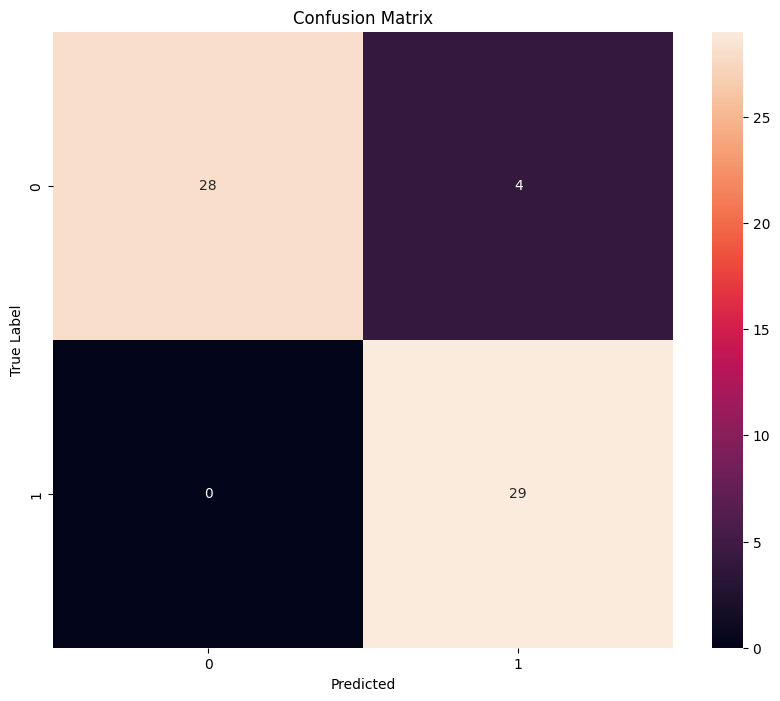

In [ ]:

num_classes = 2  # Adjust this to the number of classes in your problem
probs=plot_confusion_matrix(new_model, testdata_loader, num_classes, device)

In [ ]:
# Step 2: Stack the list of tensors into a single 2D tensor
stacked_tensor = torch.stack(probs)  # Shape will be (3, 3)

# Step 3: Convert the stacked tensor into a NumPy array
probs_array = stacked_tensor.cpu() #.numpy()

In [ ]:
Z_test['probs'] = np.array(torch.softmax(probs_array[:][:,0], dim=1)[:,1])
Z_test.reset_index().to_csv('/content/drive/MyDrive/Upwork_Projects/HBV/Experiment2/Results/Test_resultsHBV_P_93_44%.csv')

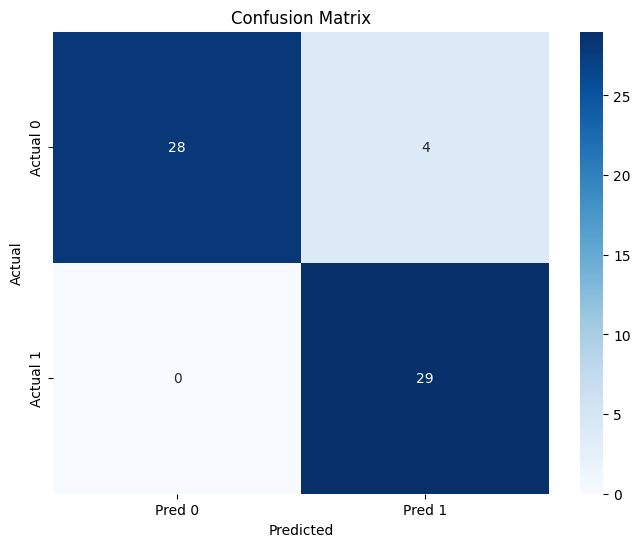

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

Z_test['pred']=(Z_test['probs'].values>0.5).astype(np.int8)
Z_test=Z_test.loc[Z_test['seq'].str.len() >0]
Z_test[['Disease',	'labels',	'probs',	'pred']]

# Step 1: Create confusion matrix
cm = confusion_matrix(Z_test['labels'], Z_test['pred'])

# Step 2: Visualize using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


  0%|          | 0/1157 [00:00<?, ?it/s]

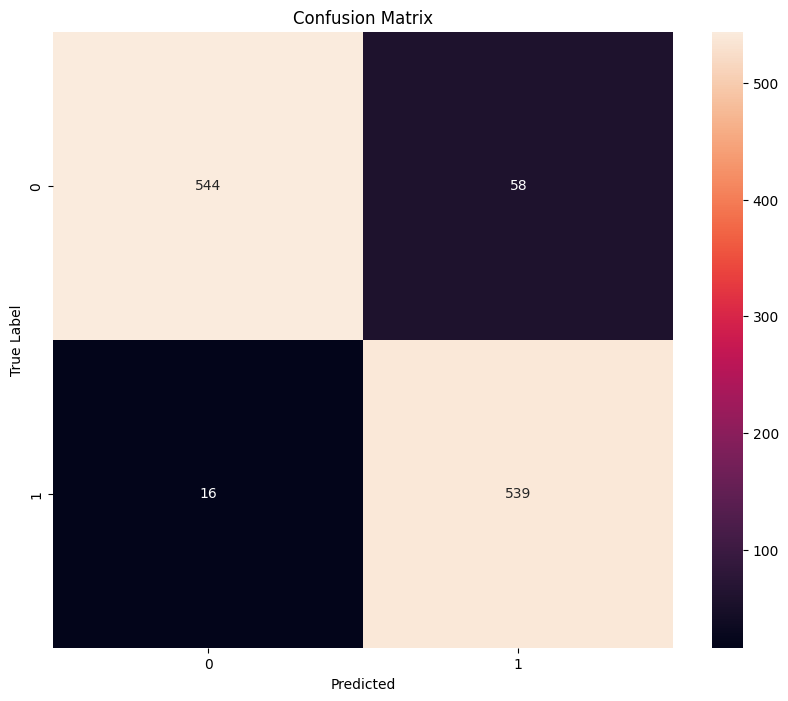

In [ ]:

num_classes = 2  # Adjust this to the number of classes in your problem
probs=plot_confusion_matrix(new_model, traindata_loader, num_classes, device)

In [ ]:
# Step 2: Stack the list of tensors into a single 2D tensor
stacked_tensor = torch.stack(probs)  # Shape will be (3, 3)

# Step 3: Convert the stacked tensor into a NumPy array
probs_array = stacked_tensor.cpu() #.numpy()
Z_train['probs'] = np.array(torch.softmax(probs_array[:][:,0], dim=1)[:,1])
Z_train.reset_index().to_csv('./results_TrainHBV9.csv')